# Caltech Pre-processing
**Purpose: Convert raw Caltech data to YOLO and COCO label formats**</br>
**Final Project**</br>
**Group 1**</br>
**DS6050 Deep Learning**</br>
**Fall 2023**</br>

In [89]:
import os
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import shutil

In [ ]:
%pip install opencv-python pylabel -q

## Download Data

In [ ]:
!wget "https://data.caltech.edu/records/f6rph-90m20/files/data_and_labels.zip?download=1" -O caltechpedestriandataset.zip

## Unpack Data

In [ ]:
!unzip caltechpedestriandataset.zip -d caltechpedestriandataset

## Create YOLO Labels

In [ ]:
!caltech-to-yolo.py

## Validate YOLO Labels

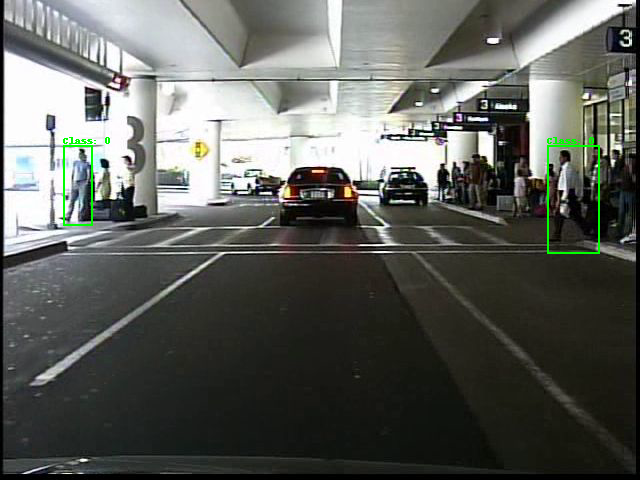

In [132]:
from PIL import Image
from PIL import ImageDraw
import cv2
import numpy as np

# Path to the YOLOv5 labels file
labels_path = '/scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/labels/train/set00_V008_0515.txt'

# Path to the image corresponding to the labels
image_path = '/scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/images/train/set00_V008_0515.png'

# Load the image
image = Image.open(image_path)

# Read the YOLOv5 labels file
with open(labels_path, 'r') as file:
    labels = file.read().strip().split('\n')

draw = ImageDraw.Draw(image)

for label in labels:
    parts = label.split()
    class_id = int(parts[0])
    x_center, y_center, width, height = map(float, parts[1:])
    
    # Convert YOLO format to image coordinates
    x, y, w, h = int((x_center - width / 2) * image.width), int((y_center - height / 2) * image.height), int(width * image.width), int(height * image.height)
    
    # Define a color for the bounding box (RGB format)
    color = (0, 255, 0)  # Green
    
    # Draw the bounding box on the image
    draw.rectangle([x, y, x + w, y + h], outline=color, width=2)
    
    # Display the class label on the image
    label_text = f'Class: {class_id}'
    draw.text((x, y - 10), label_text, fill=color)

# Display the image with bounding boxes
image

## Move Data (optional)

In [ ]:
!mv datasets/caltechpedestriandataset /scratch/ybt7qf/ds6050-group1-project/datasets --recursive

## Create YOLO Yaml

In [ ]:
%%writefile /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset.yaml
path: /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/
train: /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/images/train
val: /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/images/val
    
nc: 1
    
names: [
    'person'
]

## Convert Training Labels to COCO Format

In [ ]:
!python yolo-to-coco.py \
    --path_to_annotations /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/labels/train/ \
    --path_to_images /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/images/train/ \
    --path_to_yolo_yaml /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset.yaml \
    --name caltechpedestriandataset_train

## Convert Validation Labels to COCO Format

In [ ]:
!python yolo-to-coco.py \
    --path_to_annotations /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/labels/val/ \
    --path_to_images /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/images/val/ \
    --path_to_yolo_yaml /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset.yaml \
    --name caltechpedestriandataset_val

## Move Labels

In [5]:
!mkdir /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations/

In [11]:
!mv /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/labels/train/caltechpedestriandataset_train.json \
    /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations/instances_train2017.json

mv: cannot stat ‘/scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/labels/train/caltechpedestriandataset_train.json’: No such file or directory


In [2]:
!cp /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations/instances_train2017.json \
    /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations/custom_train.json

In [9]:
!mv /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/labels/val/caltechpedestriandataset_val.json \
    /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations/instances_val2017.json

In [3]:
!cp /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations/instances_val2017.json \
    /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations/custom_val.json

In [12]:
!ls /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations

instances_train2017.json  instances_val2017.json


## Move Images for COCO Structure

In [1]:
!mkdir /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/train2017

In [5]:
!cp /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/images/train/* \
    /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/train2017/ --recursive

In [2]:
!mkdir /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/val2017

In [6]:
!cp /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/images/val/* \
    /scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/val2017/ --recursive

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
/scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/images/train//set00_V008_0515.png


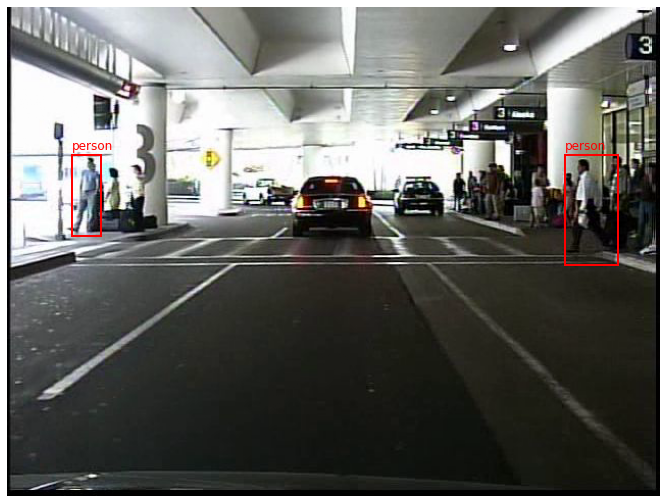

In [130]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO

# Load the COCO dataset annotations file and the corresponding image
coco = COCO('/scratch/ybt7qf/ds6050-group1-project/datasets/caltechpedestriandataset/annotations/custom_train.json')  # Replace 'annotations_file.json' with your JSON annotations file
image_id = 150  # Replace with the desired image ID
image_info = coco.loadImgs(image_id)[0]
image_path = image_info['folder']+"/"+image_info['file_name']  # Replace with the path to your image
print(image_path)

# Load the image
image = plt.imread(image_path)

# Create a figure and axis for plotting
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(image)

# Load annotations for the selected image
ann_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(ann_ids)

# Loop through annotations and plot bounding boxes
for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category = coco.loadCats(category_id)[0]['name']

    # Extract the (x, y) coordinates and dimensions of the bounding box
    x, y, width, height = bbox
    x, y, width, height = int(x), int(y), int(width), int(height)

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')

    # Add the Rectangle patch to the axis
    ax.add_patch(rect)

    # Display the category label near the bounding box
    plt.text(x, y - 5, f'{category}', color='red', fontsize=12)

# Hide axis labels and ticks
ax.axis('off')

# Show the image with annotations
plt.show()